# DATA EXPLORATION
explore training dataset of the data challenge to resolve

In [2]:
import pandas as pd
import numpy as np

pd.set_option("display.max_colwidth",2000)

# loading data
XTrain = pd.read_csv('c:/Users/I051796/Projects/CES/data/input_train.csv', sep=';')
XTest = pd.read_csv('c:/Users/I051796/Projects/CES/data/input_test.csv', sep=';')
YTrain = pd.read_csv('c:/Users/I051796/Projects/CES/data/label.csv', sep=';')

In [3]:
# merging feature space and the label on ID column
XYTrain = XTrain.merge(YTrain, on='ID')
XYTrain.head()

,ID,question,intention
0,0,"bonjour, je m suis trompé de forum pour ma question alors je la repose ici. je pris pour la première fois hier du paroxétine et ce matin c'est une catastrophe. picotement dasn tous le corps annonciateur de sueur froide très très massive et de vomissement. j'en suis à deux crises depuis 5 heure du mat. la cela semble passer mes mes mains reste moites et chaude estce normal pour la première fois merci a tous",28
1,1,est ce que le motilium me soulagera contre les nausées?,31
2,2,"mon médecin m'a prescrit adenyl. au 2ème cachet des maux de tête terribles et au 3ème palpitations, sueurs froides, chaleur intense dans la tête, tremblements, fourmillements dans la lèvre supérieure, difficultés à respirer.. dès l'arrêt du médicament tous les symptômes ont disparu. cela est-il déjà arrivé à quelqu'un??",28
3,3,Est-ce qu'il existe une forme adaptée aux enfant de 5ans du Micropakine ?,44
4,4,mon medecin me soigne pour une rhino pharingite et m'a prescrit du amoxicilline comme anti biotique. Est-ce vraiment pour cette indication?,31


# Target distribution

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002D5F6BA61D0>],
      dtype=object)

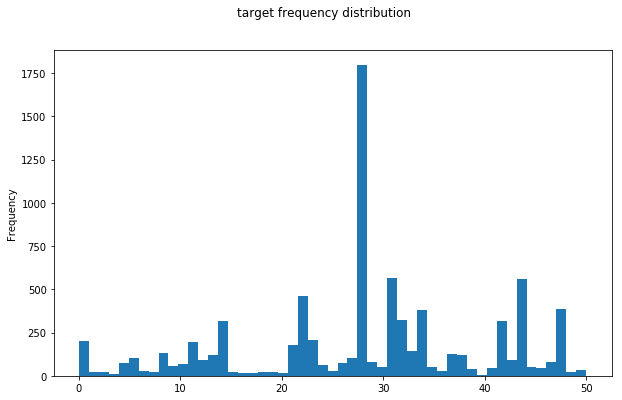

In [28]:
# vizualize intention distribution
%matplotlib inline
import matplotlib.pyplot as plt
YTrain['intention'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='target frequency distribution',figsize=(10,6),bins=51)

Target classes are actually imbalanced

In [27]:
hist = YTrain.groupby(['intention']).count()
hist.describe()

,ID
count,51.000000
mean,157.411765
std,273.415448
min,7.000000
25%,25.500000
50%,72.000000
75%,162.000000
max,1796.000000


Most of classes to predict have very low associated explanatory observations (mean=157 and median=72). As an outlier, one class holds 1750 observations

## Guess the semantic of relevant target classes (intent)
The target classes are indices and the semantic is therefore anonymized

### Manual Semantic Guess

#### first mode (intention=28)

probably it's related question on **drug side effects**

In [6]:
XYTrain[XYTrain.intention == 28].head(5)

,ID,question,intention
0,0,"bonjour, je m suis trompé de forum pour ma question alors je la repose ici. je pris pour la première fois hier du paroxétine et ce matin c'est une catastrophe. picotement dasn tous le corps annonciateur de sueur froide très très massive et de vomissement. j'en suis à deux crises depuis 5 heure du mat. la cela semble passer mes mes mains reste moites et chaude estce normal pour la première fois merci a tous",28
2,2,"mon médecin m'a prescrit adenyl. au 2ème cachet des maux de tête terribles et au 3ème palpitations, sueurs froides, chaleur intense dans la tête, tremblements, fourmillements dans la lèvre supérieure, difficultés à respirer.. dès l'arrêt du médicament tous les symptômes ont disparu. cela est-il déjà arrivé à quelqu'un??",28
7,7,je suis sous mercilon. J'ai des nausées et des saignements ?,28
12,12,"je suis sous antiobiotique depuis bientot une semaine et je me suis chopée je ne sais quoi à ma nénétte, ca gratte,c'est superficiel mais ca démenge à un point, est ce lié à l'antibiotique?",28
14,14,épilepsie et havlane ?,28


#### second mode (intention=31)

probably it's related question on **symptom-drug adequacy**

In [7]:
XYTrain[XYTrain.intention == 31].head(5)

,ID,question,intention
1,1,est ce que le motilium me soulagera contre les nausées?,31
4,4,mon medecin me soigne pour une rhino pharingite et m'a prescrit du amoxicilline comme anti biotique. Est-ce vraiment pour cette indication?,31
10,10,laroxyl à doses faibles pour le stress ?,31
31,31,La lidocaïne aide-t-elle à maigrir ?,31
37,37,L'euphytose est urtile pour l'anxiété ?,31


#### third mode (intention=44)
probably question on **pregnancy-drug interaction**

In [8]:
XYTrain[XYTrain.intention == 44].head(5)

,ID,question,intention
3,3,Est-ce qu'il existe une forme adaptée aux enfant de 5ans du Micropakine ?,44
5,5,je viens d'apprendre que je suis enceinte..savez-vous si je peux poursuivre le rubozinc ?,44
15,15,vaccins dtpe et hépatire b sont ils possible pendant la grossesse?,44
25,25,percutafeine peut-il être utiliser par les hommes ?,44
30,30,"Une maman reçoit la prescription de Montelukast 4mg Arrow granulés pour son bébé de 5 mois, elle demande si cette forme est adaptée alors que son bébé ne mange pas encore solide ?",44


#### multi-intent class
notice that the text contains in general multiple questions: count on nquestion marks may be a good candidate to identify this class

In [9]:

XYTrain[XYTrain.intention == 39].head(5)

,ID,question,intention
208,208,"on m'a prescrit microval, est ce que cette pilule est effective dès la première prise ? qu'est ce que cela fait si je commence la plaquette alors que je n'ai pas encore mes regles ?",39
266,266,"mon medecin m'a prescrit du xanax 0,50 et du stilnox. cependant j'ai l'impression que le stilnox (generique) commence a ne plus me faire effet. faudrait t'il que je lui demande plutot de l'imovane et quels sont les effets secondaires?",39
386,386,PAS DE QUESTION SUR UN MEDICAMENT,39
542,542,"samedi soir, j'ai oublié de prendre mon 17è comprimé et l'ai pris le lendemain mais pense l'avoir vomi. 4 jours avant l'oubli de ma pilule, j'ai eu un rapport non protégé : ai-je un risque de grossesse dû à ce rapport ? ma plaquette se finit dans 3 jours : au démarrage de la prochaine, puis-je recommencer à avoir des rapports non protégés?",39
661,661,"j'ai arrêté mon traitement de dépamide il y a un mois et demi et malgré le sport et un régime sévère, je ne vois pas de changement sur ma balance.. est ce que certaines parmi vous ont eu ce pb ? combien de temps vous a-t-il fallu pour retrouver votre poids normal??",39


#### unidentified questions

In [10]:
XYTrain[XYTrain.intention == 1].head(5)

,ID,question,intention
137,137,Quels sont les signes de surdosage en Mysoline?,1
179,179,Comparaison Relpax / Imigrane,1
391,391,le stablon serait-il un placebo?,1
845,845,Qu'est-ce que le calcibronate ?,1
1882,1882,Quelle forme galénique de traitement anti mycose est le mieux toléré par les muqueuses ?,1


### Automatic Semantic Guess with NMF (Non Negative Factorization) Extraction
There's an unsupervised technique to extract the topic from text corpus: NMF and LDA (Latent Dirichlet Allocation)

In [36]:
def printTopWords(model, feature_names, n_top_words, max_topics):
    for topicId, topic in enumerate(model.components_):
        if topicId > max_topics:
            return
        message = "Topic #%d: " % topicId
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import sys
sys.path.append('..')
from utils import textcleaner
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

frenchStopWords = set(stopwords.words("french"))

XTrainAndTest = pd.concat([XTrain, XTest])
XTrainAndTest.question = XTrainAndTest.question.apply(lambda text : textcleaner.cleanText(text, cleanStopWords = frenchStopWords, useStemming=True))

tfidfVectorizer = TfidfVectorizer(
    max_features=10000)

tfidf = tfidfVectorizer.fit_transform(XTrainAndTest['question'])

nmfExtractor = NMF(
    n_components=51,
    random_state=1,alpha=.1, l1_ratio=.5)

nmf = nmfExtractor.fit(tfidf)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jacques\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
tfidfFeatureNames = tfidfVectorizer.get_feature_names()
printTopWords(nmf, tfidfFeatureNames, n_top_words=25, max_topics=5)

Topic #0: depuis prend plus semain ça an normal quelqu mal cel tout pens problem peu ca arriv ventr tres cet comm douleur bonjour saign merc pert
Topic #1: secondair effet infanrixquint tolexin zoloft influenzinum microval don trinordiol rotarix prescr lexomil citalopram gripp beaucoup abilify laroxyl zyprex dostinex foliqu lutéran lutenyl tamik minidril dompéridon
Topic #2: quel dosag dos posolog médic thérapeut altern indiqu maximal form leponex vitamin moment action class util recommand cas différent appartient rivotril arnic prix effet enfant
Topic #3: grossess pend possibl levothyrox prescrir dur champix aerius dang flagyl test autoris ginkor essentiel début compatibl vogalen subutex lysopain azithromycin depakot semain efferalgan primperan danger
Topic #4: vaccin gripp hépatit dtp varicel ror gardasil exist rappel fievr inject hepatit tétanos polio col méningit contr apres an réaction jaun utérus dt où fil
Topic #5: combien temp bout efficac effet faut dur attendr agir met agit a

* Topic 1 is related to adverse effect of drug
* Topic 2 is related to pregnancy
* Topic 3 is about drug effect duration

The NMF seems to be quite efficient to extract the main topics

In [47]:
# save the topics with their respective 40 first top words for future usage (feature engineering for classical technique)
n_top_words = 50
rows = []
for topicId, topic in enumerate(nmf.components_):    
    rows.append([topicId] + [tfidfFeatureNames[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

names = []
names.append('topic_id')
for idx in range(1,51):
    names.append('top_word_' + str(idx))
    
pd.DataFrame(rows, columns = names).to_csv('../../data/staging_data/topic_top_words.csv', index = None)

## Feature Space Distribution Visualization
To have a rough estimate on the classification task difficulty, it's worth to visualize how the input features are distributed and how well labels are separable to each other.

For that prupose, I simply vectorize the text with TF-IDF transformation and proceed with a dimension reduction into a 2-dimensional space which can be easily displayed: I utilize a linear (PCA) and (t-SNE) dimension reduction techniques. t-SNE algorithm has the downside to be extremely slow and practically speaking, not very convenient...

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')

vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words=stopwords.words('french'))

XTFIDFVectorizedTrain = vectorizer.fit_transform(XTrain['question'])
XTFIDFVectorizedTrain = pd.DataFrame(XTFIDFVectorizedTrain.toarray())
XTFIDFVectorizedTrain.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jacques\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,0,1,2,3,4,5,6,7,8,9,...,8996,8997,8998,8999,9000,9001,9002,9003,9004,9005
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
import numpy as np
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=2, batch_size=3)
PCATrain = pd.DataFrame(ipca.fit_transform(XTFIDFVectorizedTrain))

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
TSNETrain =  pd.DataFrame(tsne.fit_transform(XTFIDFVectorizedTrain))

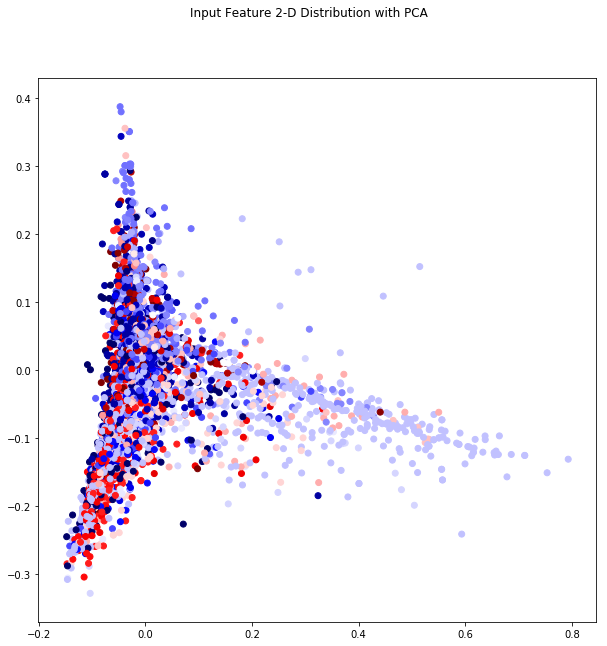

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig = plt.figure(figsize=(10,10))
fig.suptitle("Input Feature 2-D Distribution with PCA")
plt.scatter(PCATrain[0], PCATrain[1], c=YTrain['intention'], cmap=cm.seismic_r)
plt.show()

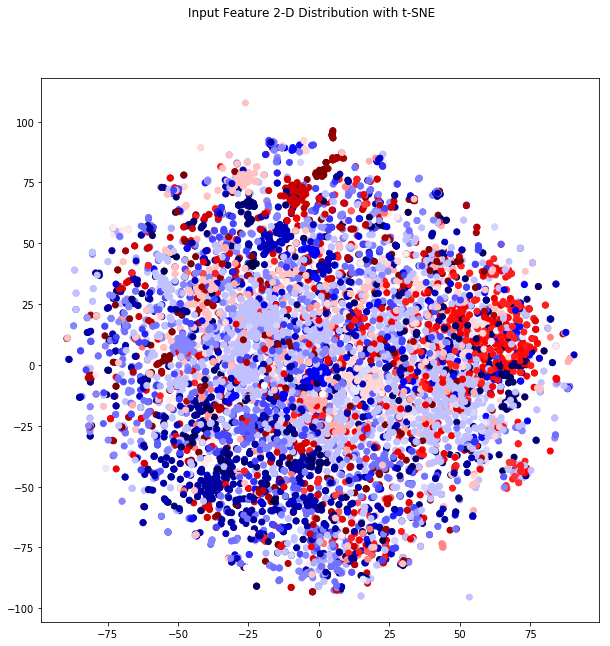

In [15]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Input Feature 2-D Distribution with t-SNE")
plt.scatter(TSNETrain[0], TSNETrain[1], c=YTrain['intention'], cmap=cm.seismic_r)
plt.show()

We can observe that learning on raw training dataset without any feature engineering would probably lead to very poor accuracy. Raw features should be preprocessed to make appear some salient calculated features improving the classifier efficiency.

## Text Structure Analysis
I focus now on how the texts are shaped from a syntactical/lexical standpoint.

### Basic Stastistics

In [3]:
from keras.preprocessing.text import Tokenizer
import pandas as pd

XTrain = pd.read_csv('../../data/staging_data/clean_input_train.csv', sep=';')

tokenizer = Tokenizer(num_words= 10000)
tokenizer.fit_on_texts(XTrain['question'])
wordFreqs = tokenizer.word_counts

d:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
XTrain['text length']  = XTrain['question'].map(lambda x: len(x))
XTrain['text length'].describe()

count    8028.000000
mean       69.238540
std        89.399312
min         4.000000
25%        28.000000
50%        42.000000
75%        80.000000
max      2744.000000
Name: text length, dtype: float64

In [5]:
from nltk.tokenize import word_tokenize
def getWordCount(word):
    return len(word_tokenize(word, language='french'))
    
XTrain['word count']  = XTrain['question'].map(lambda x: getWordCount(x))
XTrain['word count'].describe()

count    8028.000000
mean        9.854758
std        13.273684
min         1.000000
25%         4.000000
50%         6.000000
75%        11.000000
max       408.000000
Name: word count, dtype: float64

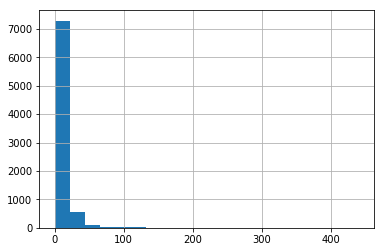

In [125]:
XTrain['word count'].hist(bins=20)

Word count is in general low with median and mean equal to ~ 5 words: the question is formulated very concisely !

In [6]:
df = pd.DataFrame.from_dict(wordFreqs,orient='index', columns=['word frequency'])
df.sort_values(['word frequency'], ascending=False, inplace=True)
df.describe()

,word frequency
count,9378.000000
mean,8.421305
std,42.488629
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,1993.000000


In [8]:
# most frequent words
df.head(20)

,word frequency
a,1993
les,1389
si,827
depuis,780
peut,779
prendre,771
pilule,751
jours,593
plus,557
effets,554


As expected, most frequent words are common vocabulary and usually don't refer specifically to medical domain,except for 'pilule', 'vaccin' and 'grossesse' words.

A noticeable point is the presence of many morphological variants of the root word 'prendre'.

Another interesting information is a certain predominance of term related to time concept ('depuis', 'temps', 'jours', 'mois', ...). Recognizing time named entity may be worth to improve the classifier.